In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_4pm = pd.read_csv('output_4PM.csv')
df_8pm = pd.read_csv('output_8PM.csv')
df_10am = pd.read_csv('output_10am.csv')

#### Finding the most Influential factor for Throughput

In [53]:
## concatenating the time of day data into one file
total = pd.concat([df_4pm, df_8pm, df_10am])

In [54]:
total

,File Size,Download Speed Limit,No. of Concurrent Downloads,Throughput (bite/seconds),Delay (seconds)
0,1B,500k,1,4.766285e+00,0.209807
1,1B,500k,3,1.959296e-01,5.103874
2,1B,500k,5,6.817655e+00,0.146678
3,1B,500k,7,8.245315e+00,0.121281
4,1B,1M,1,9.513119e+00,0.105118
...,...,...,...,...,...
175,500MB,2M,7,3.309001e+09,0.158443
176,500MB,inf,1,3.492622e+09,0.150113
177,500MB,inf,3,3.651972e+09,0.143563
178,500MB,inf,5,3.364811e+09,0.155815


In [47]:
cols = list(total.columns)

for i in range(3):
    col = cols[i]
    print("Variation of maximum and minimum value of Throughput for the factor "+cols[i]+" is: ")
    print(str(total.groupby(cols[i])['Throughput (bite/seconds)'].sum().max() - total.groupby(cols[i])['Throughput (bite/seconds)'].sum().min()))

Variation of maximum and minimum value of Throughput for the factor File Size is: 
65612971633.21719
Variation of maximum and minimum value of Throughput for the factor Download Speed Limit is: 
3119800510.01523
Variation of maximum and minimum value of Throughput for the factor No. of Concurrent Downloads is: 
1777216583.6555328


In [48]:
print("Variation of maximum and minimum value of Throughput for the factor time of Day is: ")
max([df_4pm['Throughput (bite/seconds)'].sum(), df_8pm['Throughput (bite/seconds)'].sum(), df_10am['Throughput (bite/seconds)'].sum()]) - min([df_4pm['Throughput (bite/seconds)'].sum(), df_8pm['Throughput (bite/seconds)'].sum(), df_10am['Throughput (bite/seconds)'].sum()])

Variation of maximum and minimum value of Throughput for the factor time of Day is: 


79606888134.5473

#### The most Influential factor is time of the Day
Plotting throughput vs time of day

Text(0, 0.5, 'ThroughPut')

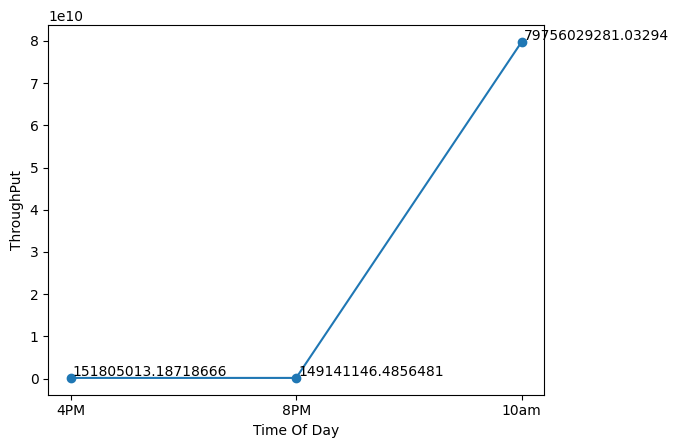

In [5]:
plt.plot(["4PM", "8PM", "10am"], [df_4pm['Throughput (bite/seconds)'].sum(), df_8pm['Throughput (bite/seconds)'].sum(), df_10am['Throughput (bite/seconds)'].sum()])
plt.scatter(["4PM", "8PM", "10am"], [df_4pm['Throughput (bite/seconds)'].sum(), df_8pm['Throughput (bite/seconds)'].sum(), df_10am['Throughput (bite/seconds)'].sum()])

for xi, yi in zip(["4PM", "8PM", "10am"], [df_4pm['Throughput (bite/seconds)'].sum(), df_8pm['Throughput (bite/seconds)'].sum(), df_10am['Throughput (bite/seconds)'].sum()]):
    plt.annotate(str(yi),
                xy=(xi, yi), xycoords='data',
                xytext=(1.5, 1.5), textcoords='offset points')

plt.xlabel("Time Of Day")
plt.ylabel("ThroughPut")

Text(0, 0.5, 'Total Time Taken')

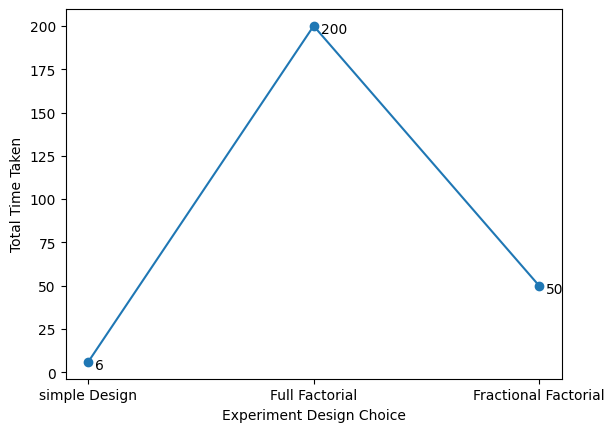

In [9]:
x = ["simple Design", "Full Factorial", "Fractional Factorial"]
y = [6, 200, 50]
plt.plot(x, y)
plt.scatter(x, y)

for xi, yi in zip(x, y):
    plt.annotate(str(yi),
                xy=(xi, yi), xycoords='data',
                xytext=(5, -5), textcoords='offset points')

plt.xlabel("Experiment Design Choice")
plt.ylabel("Total Time Taken")